In [1]:
!pip install openpyxl
import pandas as pd
import openpyxl
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns

     |████████████████████████████████| 243 kB 1.2 MB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=7063b2abcf17da202563b9b29c412163d1d1fc0c5ba8364f1820fa6638ad475f
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


In [2]:
df = pd.read_excel("../input/hotels-accommodation-prices-dataset/Hotels.xlsx")
df.head()

,ID,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
0,1,Europe,139,5,350,8.3,1,25,Sarajevo
1,2,Europe,187,5,350,8.3,2,40,Sarajevo
2,3,Hills,255,5,10000,8.5,3,42,Sarajevo
3,4,Hills,141,5,10000,8.5,2,42,Sarajevo
4,5,Boutique,117,4,450,8.7,1,15,Sarajevo


### Boxplots

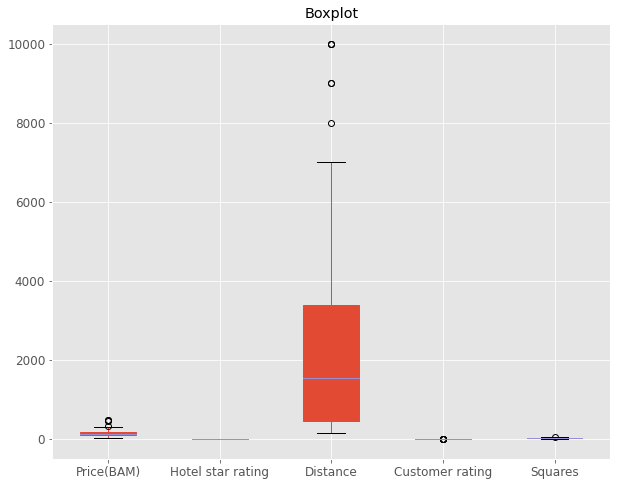

In [3]:
fig, ax = plt.subplots(figsize = (10,8))

pd.DataFrame(df[["Price(BAM)","Hotel star rating", 
                 "Distance", "Customer rating", "Squares"]]).boxplot(fontsize= 12, patch_artist=True, vert = True)

ax.set(title = "Boxplot");


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


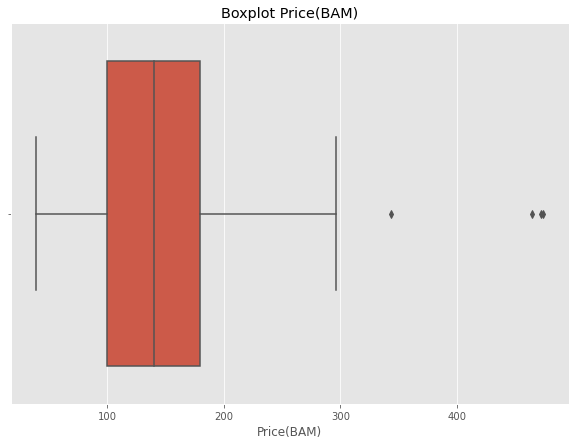

In [4]:
plt.figure(figsize = (10,7))

sns.boxplot(df["Price(BAM)"])

plt.title("Boxplot Price(BAM)")

plt.show()

### Barplots

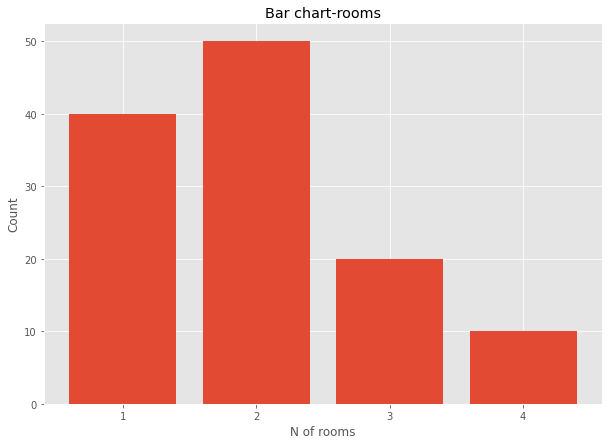

In [5]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(x = ["1", "2", "3", "4"], height = df["Rooms"].value_counts(sort = False))

ax.set(title = "Bar chart-rooms", xlabel = "N of rooms", ylabel = "Count")

plt.show()

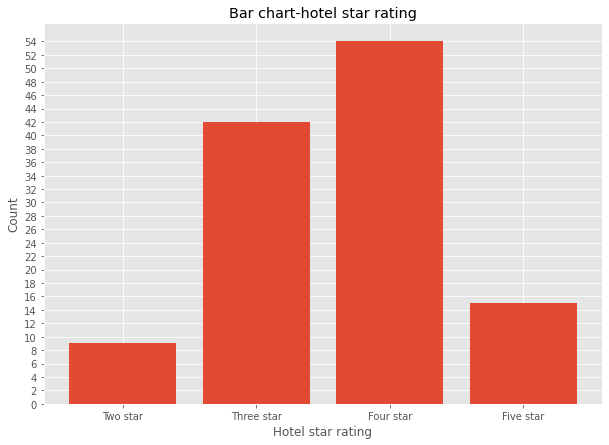

In [6]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(x = ["Two star", "Three star", "Four star", "Five star"], 
       height = df["Hotel star rating"].value_counts(sort = False))

ax.set(title = "Bar chart-hotel star rating", xlabel = "Hotel star rating", ylabel = "Count")

plt.yticks(range(0, max(df["Hotel star rating"].value_counts(sort = False)) + 1, 2))

#plt.xticks(np.arange(min(x), max(x)+1, 1.0)) ovde mogu floats

plt.show()

<Figure size 432x288 with 0 Axes>

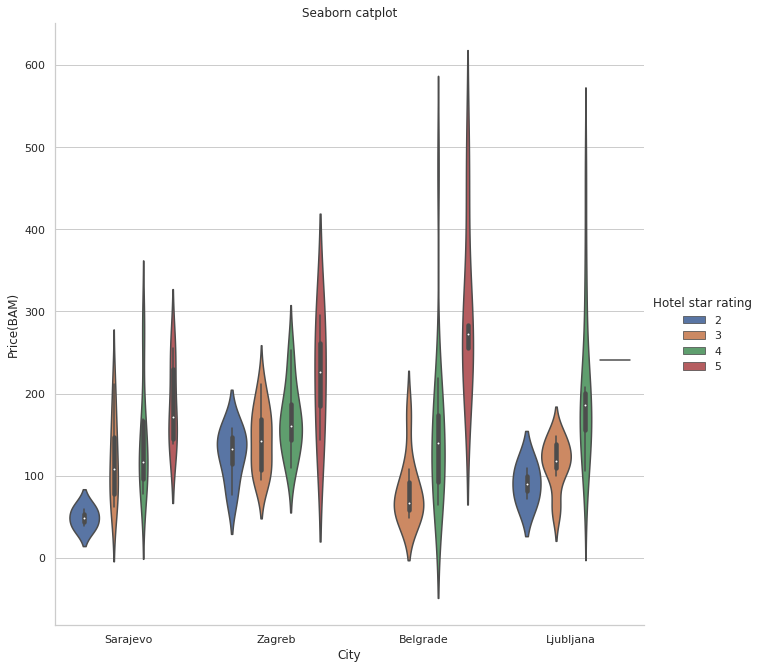

In [7]:
plt.figure()

sns.set_theme(style="whitegrid")

sns.catplot(data = df,x = "City", y = "Price(BAM)", hue = "Hotel star rating", 
            height = 9, kind = "violin")

plt.title("Seaborn catplot")

plt.show()

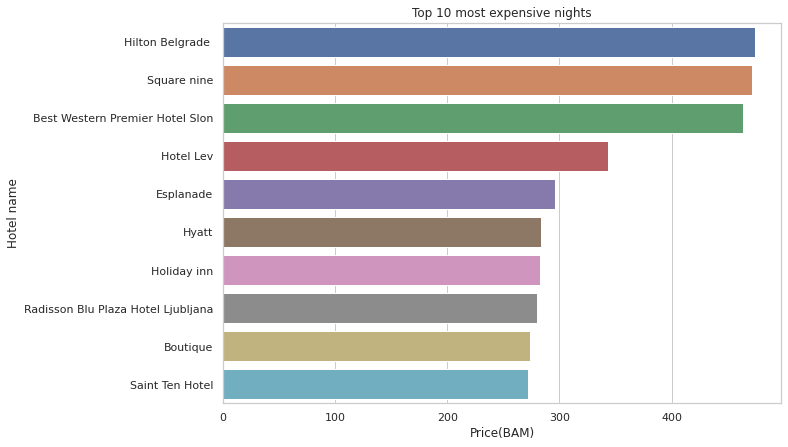

In [8]:
top10 = df[["Hotel name", "Price(BAM)"]].sort_values(by = "Price(BAM)", ascending = False)[:10]

plt.figure(figsize = (10,7))

sns.barplot(y = top10["Hotel name"], x = top10["Price(BAM)"])

plt.title("Top 10 most expensive nights")

            
plt.show()

### Histograms

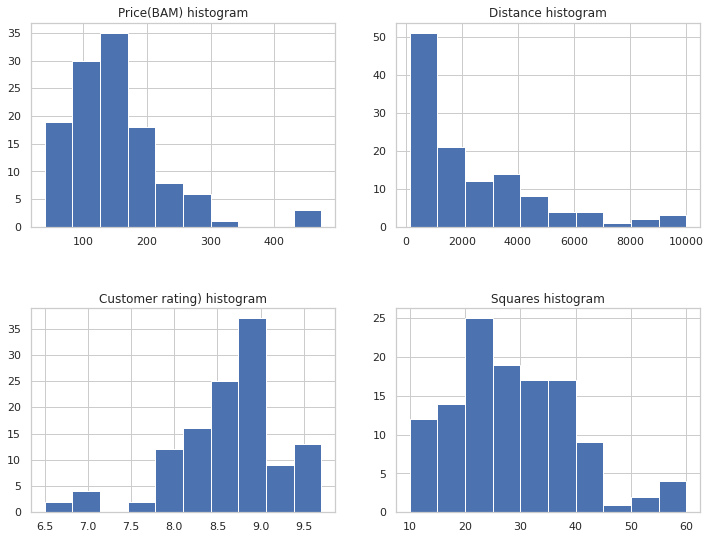

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,9))

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)


ax1.hist(df["Price(BAM)"])
ax1.set(title = "Price(BAM) histogram")

ax2.hist(df["Distance"])
ax2.set(title = "Distance histogram")

ax3.hist(df["Customer rating"])
ax3.set(title = "Customer rating) histogram")

ax4.hist(df["Squares"])
ax4.set(title = "Squares histogram")

plt.show()

### Correlation matrix

In [10]:
df.drop("ID", axis = 1).corr()

,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares
Price(BAM),1.000000,0.486735,-0.098980,0.324418,0.438016,0.660703
Hotel star rating,0.486735,1.000000,-0.073850,0.499198,-0.022923,0.436063
Distance,-0.098980,-0.073850,1.000000,-0.344031,0.056606,0.054665
Customer rating,0.324418,0.499198,-0.344031,1.000000,-0.050520,0.275017
Rooms,0.438016,-0.022923,0.056606,-0.050520,1.000000,0.420093
Squares,0.660703,0.436063,0.054665,0.275017,0.420093,1.000000


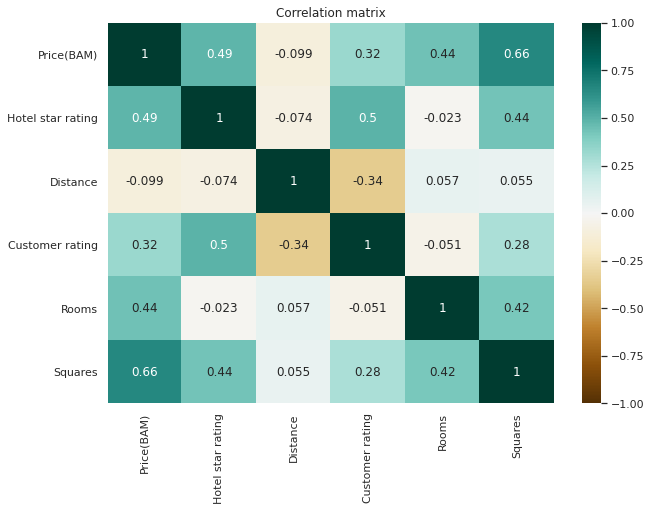

In [11]:
plt.figure(figsize = (10,7))

sns.heatmap(df.drop("ID", axis = 1).corr(), annot = True, vmin = -1, vmax = 1, cmap = "BrBG")

plt.title("Correlation matrix")

plt.show()

### Scatterplot

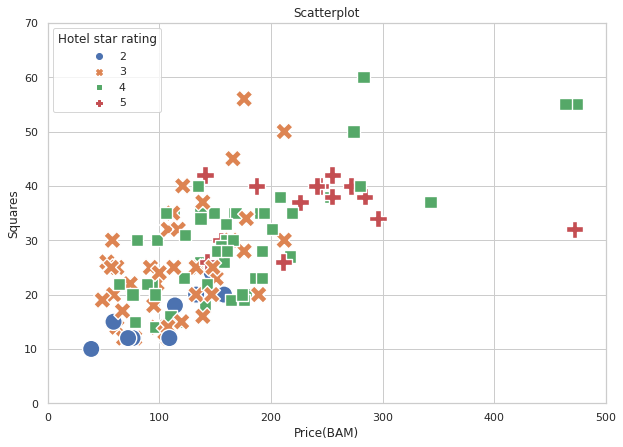

In [12]:
plt.figure(figsize = (10,7))

sns.scatterplot(x = df["Price(BAM)"], y = df["Squares"], hue = df["Hotel star rating"],
                palette = 'deep', style = df["Hotel star rating"], s = 300)

plt.title("Scatterplot")

plt.xlim(0, 500)
plt.ylim(0, 70)

plt.show()